In [1]:
%matplotlib inline

import qsharp as qs
import numpy as np
import re

import sys
sys.path.insert(1, 'Visualization')

from Visualization.Cube import Cube
from Visualization.Common import *

Preparing Q# environment...


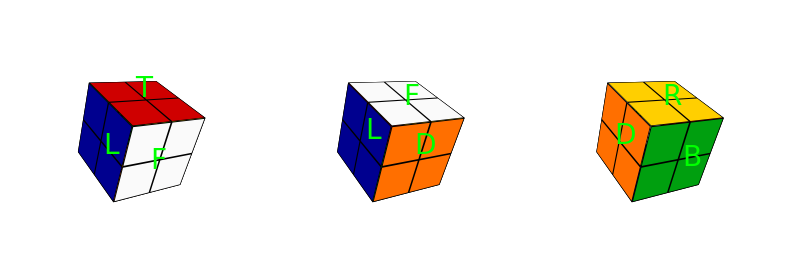

F-Front; D-Down; B-Back; T-Top; L-Left; R-Right


In [2]:
cube = Cube()
cube.plot_3d_views()

In [3]:
generate_cube_state = qs.compile('''

open Microsoft.Quantum.Diagnostics;


open Quantum.RubiqLib.Creation;
open Quantum.RubiqLib.Moves;

operation generateState() : Unit
{
    using (register = Qubit[5]) {
        let cube = InitCube(register);
        RotateLeft(cube);
        RotateTop(cube);
        
        DumpMachine();
        DumpMachine("Resources/cubeState1.txt");
        
        ResetAll(register);
    }    
}

''')           

In [4]:
generate_cube_state.simulate()

|0⟩	0.10206185510733587 + -0.1767763185606388𝑖
|1⟩	-0.20412436274021395 + -4.454842463009394E-17𝑖
|2⟩	0.10206185510733587 + -0.1767763185606388𝑖
|3⟩	-0.20412436274021395 + -4.454842463009394E-17𝑖
|4⟩	-0.10206218137010697 + -0.176776883664335𝑖
|5⟩	-0.10206218137010697 + -0.176776883664335𝑖
|6⟩	-0.20412436274021395 + -4.454842463009394E-17𝑖
|7⟩	0.20412436274021395 + 1.955039988431431E-17𝑖
|8⟩	-0.10206185510733583 + 0.1767763185606388𝑖
|9⟩	0.10206185510733587 + -0.1767763185606388𝑖
|10⟩	-0.10206185510733583 + 0.1767763185606388𝑖
|11⟩	0.10206185510733587 + -0.1767763185606388𝑖
|12⟩	0.20412436274021395 + 1.955039988431431E-17𝑖
|13⟩	0.102062181370107 + 0.176776883664335𝑖
|14⟩	-0.10206185510733583 + 0.1767763185606388𝑖
|15⟩	0.102062181370107 + 0.176776883664335𝑖
|16⟩	0.20412436274021395 + 1.955039988431431E-17𝑖
|17⟩	-0.10206185510733583 + 0.1767763185606388𝑖
|18⟩	-0.10206218137010697 + -0.176776883664335𝑖
|19⟩	-0.10206218137010697 + -0.176776883664335𝑖
|20⟩	-0.20412436274021395 + -4.454842463009394E-17𝑖
|21⟩	0.20412436274021395 + 1.955039988431431E-17𝑖
|22⟩	0.102062181370107 + 0.176776883664335𝑖
|23⟩	0.102062181370107 + 0.176776883664335𝑖
|24⟩	0 + 0𝑖
|25⟩	0 + 0𝑖
|26⟩	0 + 0𝑖
|27⟩	0 + 0𝑖
|28⟩	0 + 0𝑖
|29⟩	0 + 0𝑖
|30⟩	0 + 0𝑖
|31⟩	0 + 0𝑖

()

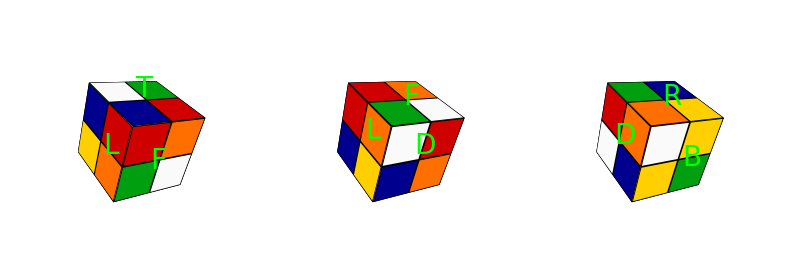

F-Front; D-Down; B-Back; T-Top; L-Left; R-Right


In [5]:
with open(r"Resources\CubeState.txt", encoding="utf8") as file:
    cube_state_str = file.read()
    cube_state = translate_quantum_phase_into_cube_state(cube_state_str)

initialized_cube = Cube(cube_state)
initialized_cube.plot_3d_views()